In [1]:
import outliers_detect as od

In [2]:
PATH="C:\\Users\\98gud\\Desktop\\pck\\dataset\\"

## 데이터 셋-1:  fraud

In [3]:

df=od.pd.read_csv(PATH+"creditcard.csv")


In [4]:
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
rate=1.5
IQR_outliers_total=[]
cols=df.columns

for i,col in enumerate(cols):
    ## 각 col마다 iqr 범위
    quartile_1 = df[col].quantile(0.25) #1 사분위수 (25% 지점수)
    quartile_3 = df[col].quantile(0.75) #3 사분위수 (70% 지점수)
    IQR_range=abs(quartile_1-quartile_3)*rate
    IQR_under=quartile_1-IQR_range
    IQR_up=quartile_3+IQR_range
    
    count=0
    
    outlier=od.np.zeros(len(df[col]))
 

    df_prime=df[col].values
    for j,value in enumerate(df_prime):
        if value>IQR_up or value<IQR_under:
            outlier[j]=-1
   
    outlier=od.pd.DataFrame(outlier,columns=['outlier'])

    IQR_outlier=outlier.loc[outlier['outlier']==-1]
    temp=list(IQR_outlier.index)
    IQR_outliers_total.extend(temp)

In [10]:
outlier=od.np.zeros(len(df[col]))
for i in IQR_outliers_total:
    outlier[i]=-1
df=df.assign(outlier=outlier)

In [11]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,outlier
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [12]:
df=df.drop(df[['outlier']],axis=1)

In [13]:
x=od.if_outliers()
y=x.if_index(df)
z=x.if_score(df)

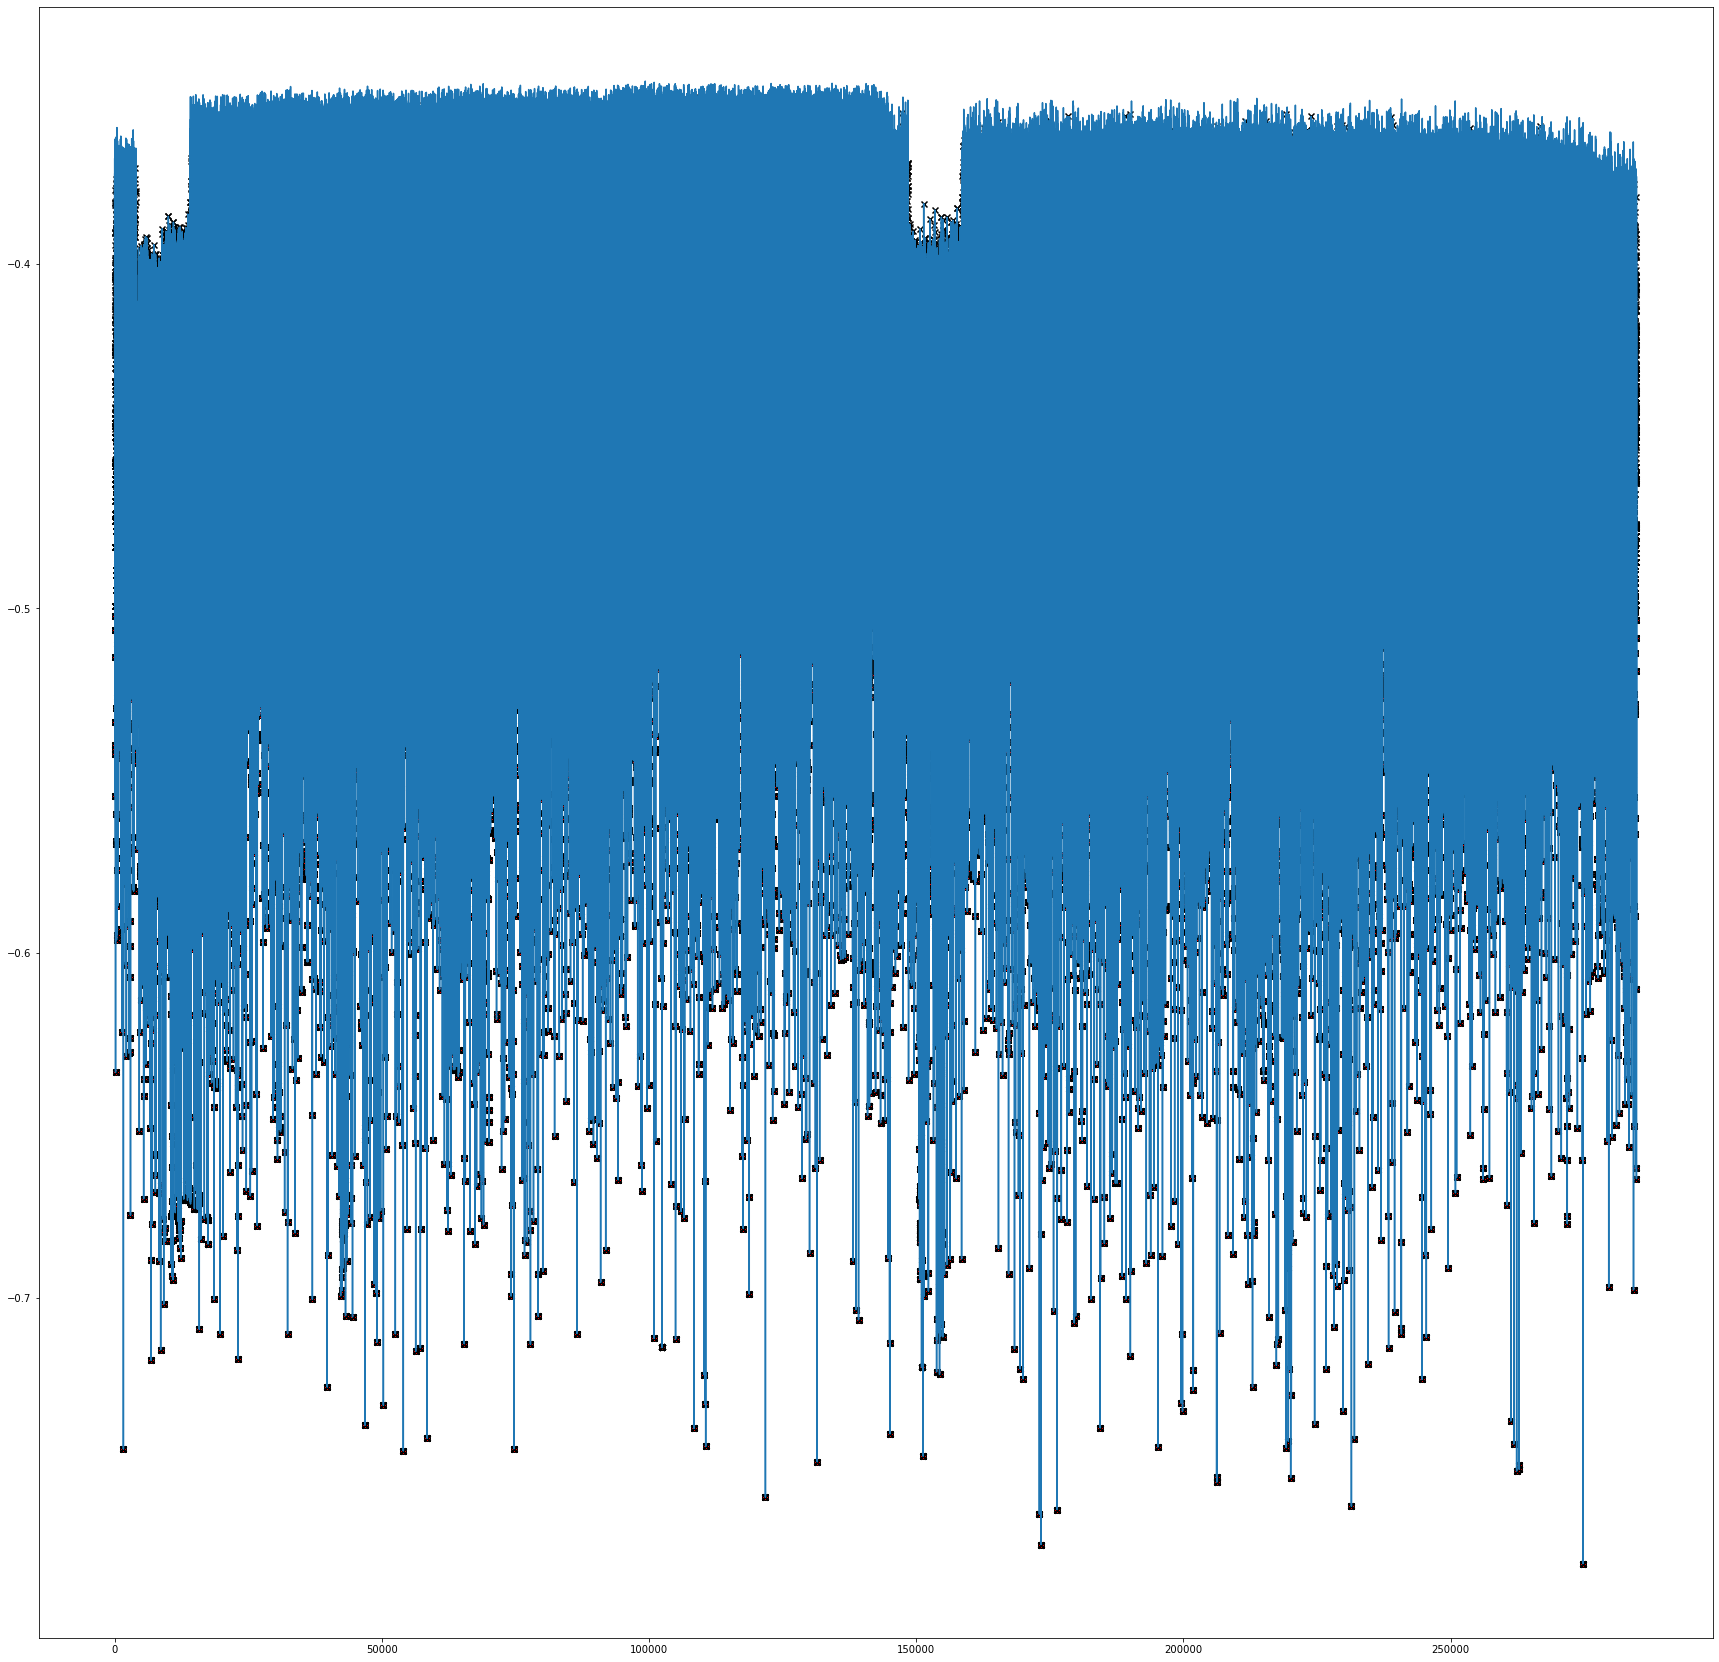

In [30]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
plt.plot(df.index,z)
plt.scatter(y,z[[i for i in y]],
                edgecolor="k",color="red",marker="o")
plt.scatter(IQR_outliers_total,z[[i for i in IQR_outliers_total]],
            edgecolor="k",color="black",marker="x")
plt.show()


In [31]:
print(len(set(y).intersection(set(IQR_outliers_total))))

9895


In [32]:
print(len(set(y).difference(set(IQR_outliers_total))))

0


## 데이터 셋 -2: bankrupt

In [33]:
df=od.pd.read_csv(PATH+"data.csv")
rate=1.5
IQR_outliers_total=[]
cols=df.columns

for i,col in enumerate(cols):
    ## 각 col마다 iqr 범위
    quartile_1 = df[col].quantile(0.25) #1 사분위수 (25% 지점수)
    quartile_3 = df[col].quantile(0.75) #3 사분위수 (70% 지점수)
    IQR_range=abs(quartile_1-quartile_3)*rate
    IQR_under=quartile_1-IQR_range
    IQR_up=quartile_3+IQR_range
    
    count=0
    
    outlier=od.np.zeros(len(df[col]))
 

    df_prime=df[col].values
    for j,value in enumerate(df_prime):
        if value>IQR_up or value<IQR_under:
            outlier[j]=-1
   
    outlier=od.pd.DataFrame(outlier,columns=['outlier'])

    IQR_outlier=outlier.loc[outlier['outlier']==-1]
    temp=list(IQR_outlier.index)
    IQR_outliers_total.extend(temp)

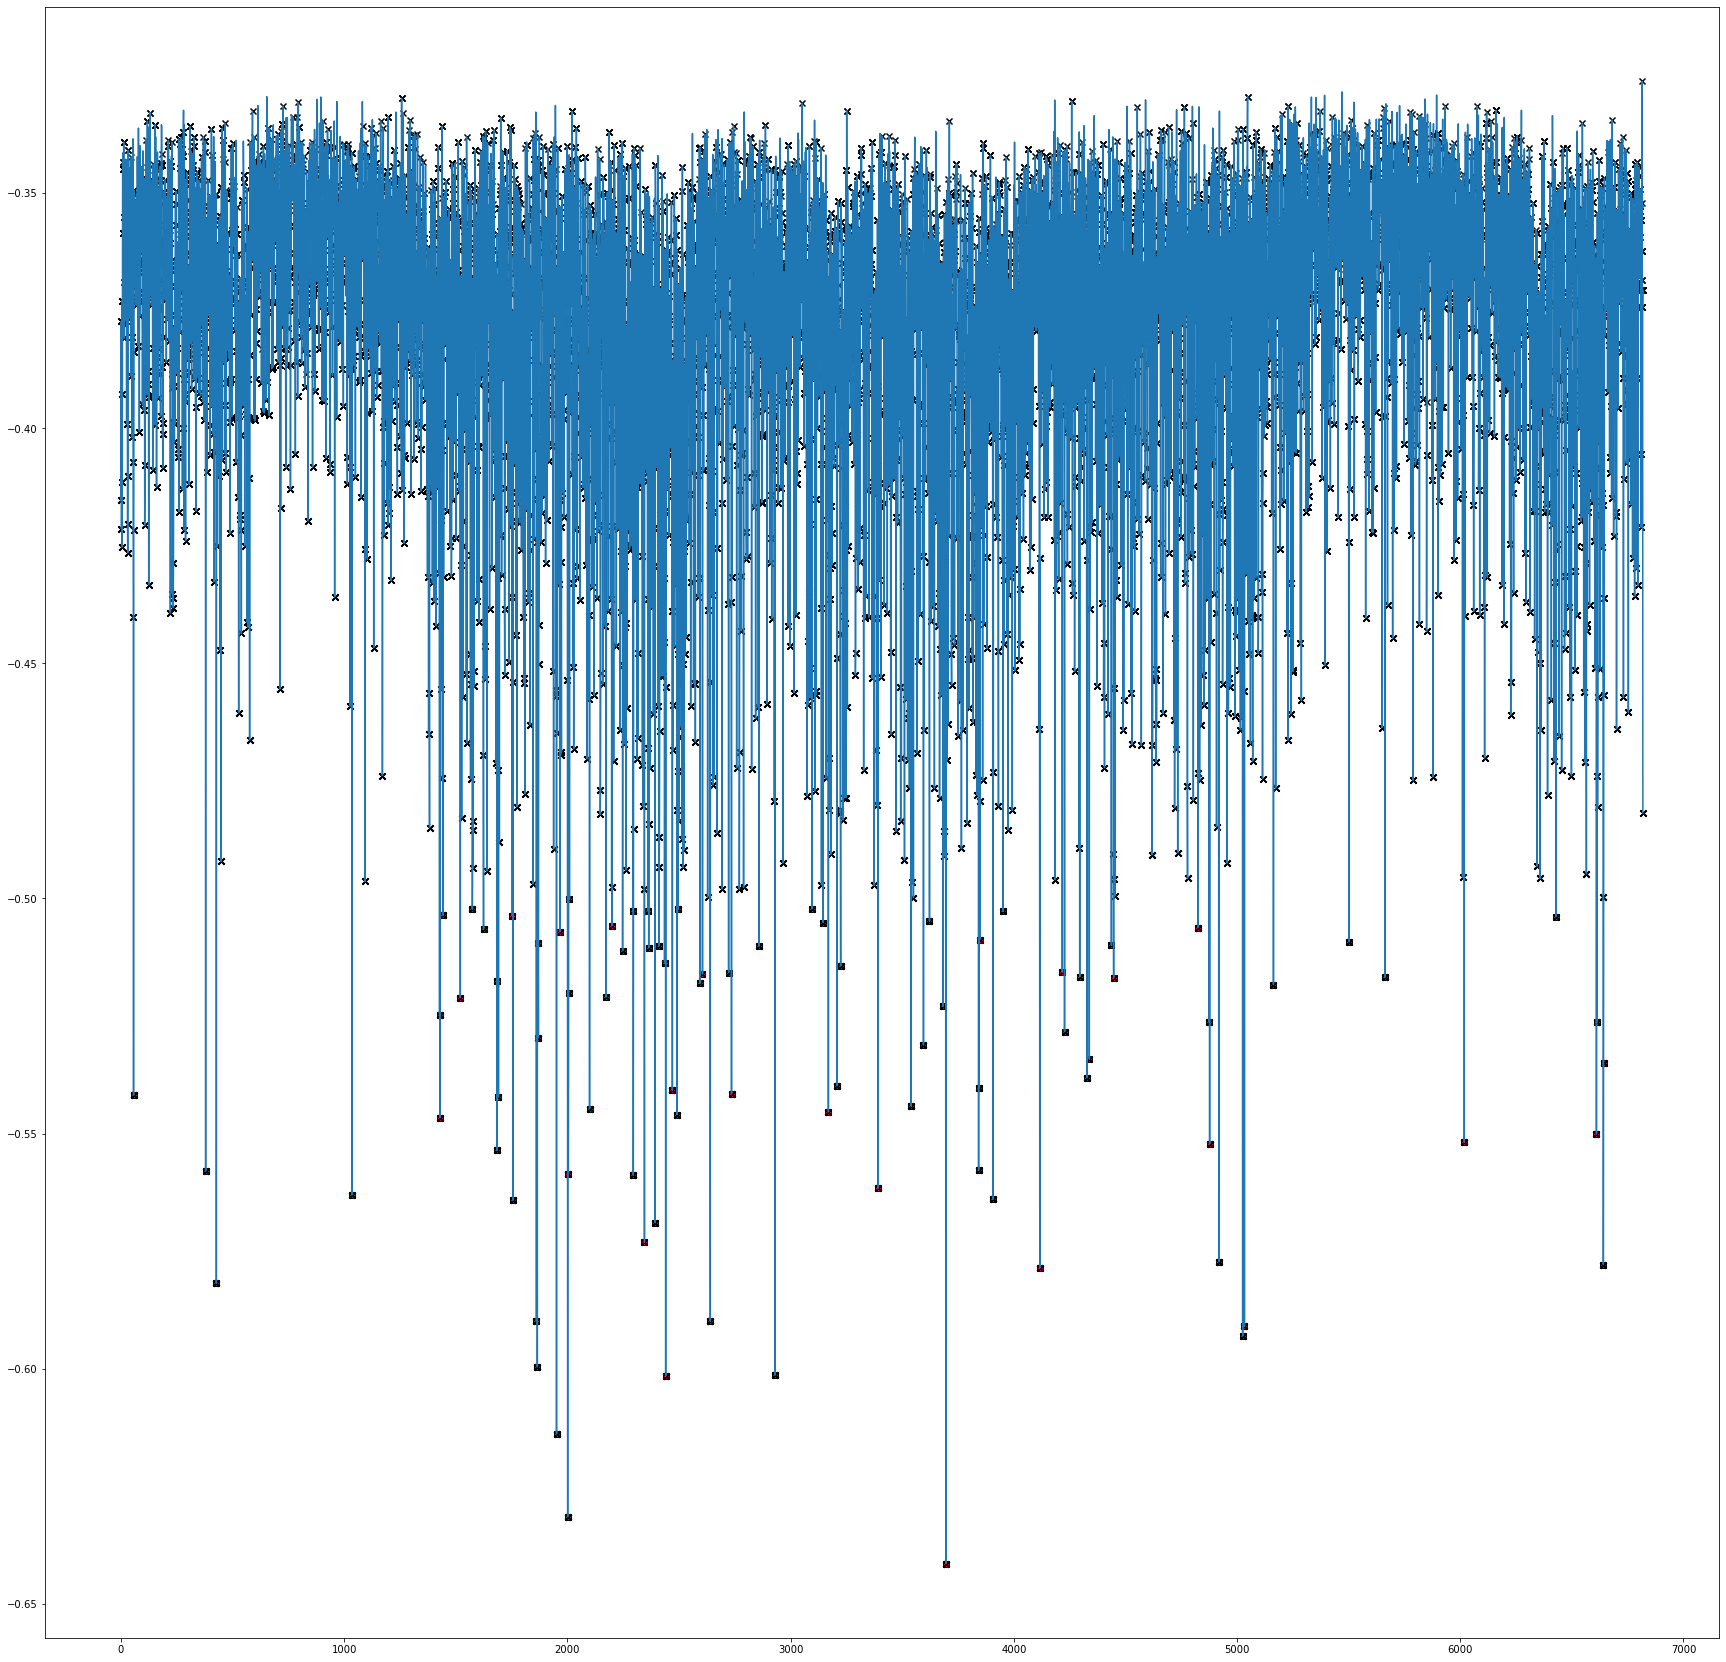

In [34]:
x=od.if_outliers()
y=x.if_index(df)
z=x.if_score(df)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
plt.plot(df.index,z)
plt.scatter(y,z[[i for i in y]],
                edgecolor="k",color="red",marker="o")
plt.scatter(IQR_outliers_total,z[[i for i in IQR_outliers_total]],
            edgecolor="k",color="black",marker="x")
plt.show()


In [35]:
print(len(set(y).intersection(set(IQR_outliers_total))))

87


In [36]:
print(len(set(y).difference(set(IQR_outliers_total))))

0


In [46]:

print(len(set(IQR_outliers_total).difference(set(y))))

92


## 데이터 셋-3: gasoline price, time series

In [40]:
df=od.pd.read_csv(PATH+"gasoline and diesel retail price.csv")
rate=1.5
IQR_outliers_total=[]

df=df.drop(df[['Date']],axis=1)
cols=df.columns
for i,col in enumerate(cols):
    ## 각 col마다 iqr 범위
    quartile_1 = df[col].quantile(0.25) #1 사분위수 (25% 지점수)
    quartile_3 = df[col].quantile(0.75) #3 사분위수 (70% 지점수)
    IQR_range=abs(quartile_1-quartile_3)*rate
    IQR_under=quartile_1-IQR_range
    IQR_up=quartile_3+IQR_range
    
    count=0
    
    outlier=od.np.zeros(len(df[col]))
 

    df_prime=df[col].values
    for j,value in enumerate(df_prime):
        if value>IQR_up or value<IQR_under:
            outlier[j]=-1
   
    outlier=od.pd.DataFrame(outlier,columns=['outlier'])

    IQR_outlier=outlier.loc[outlier['outlier']==-1]
    temp=list(IQR_outlier.index)
    IQR_outliers_total.extend(temp)

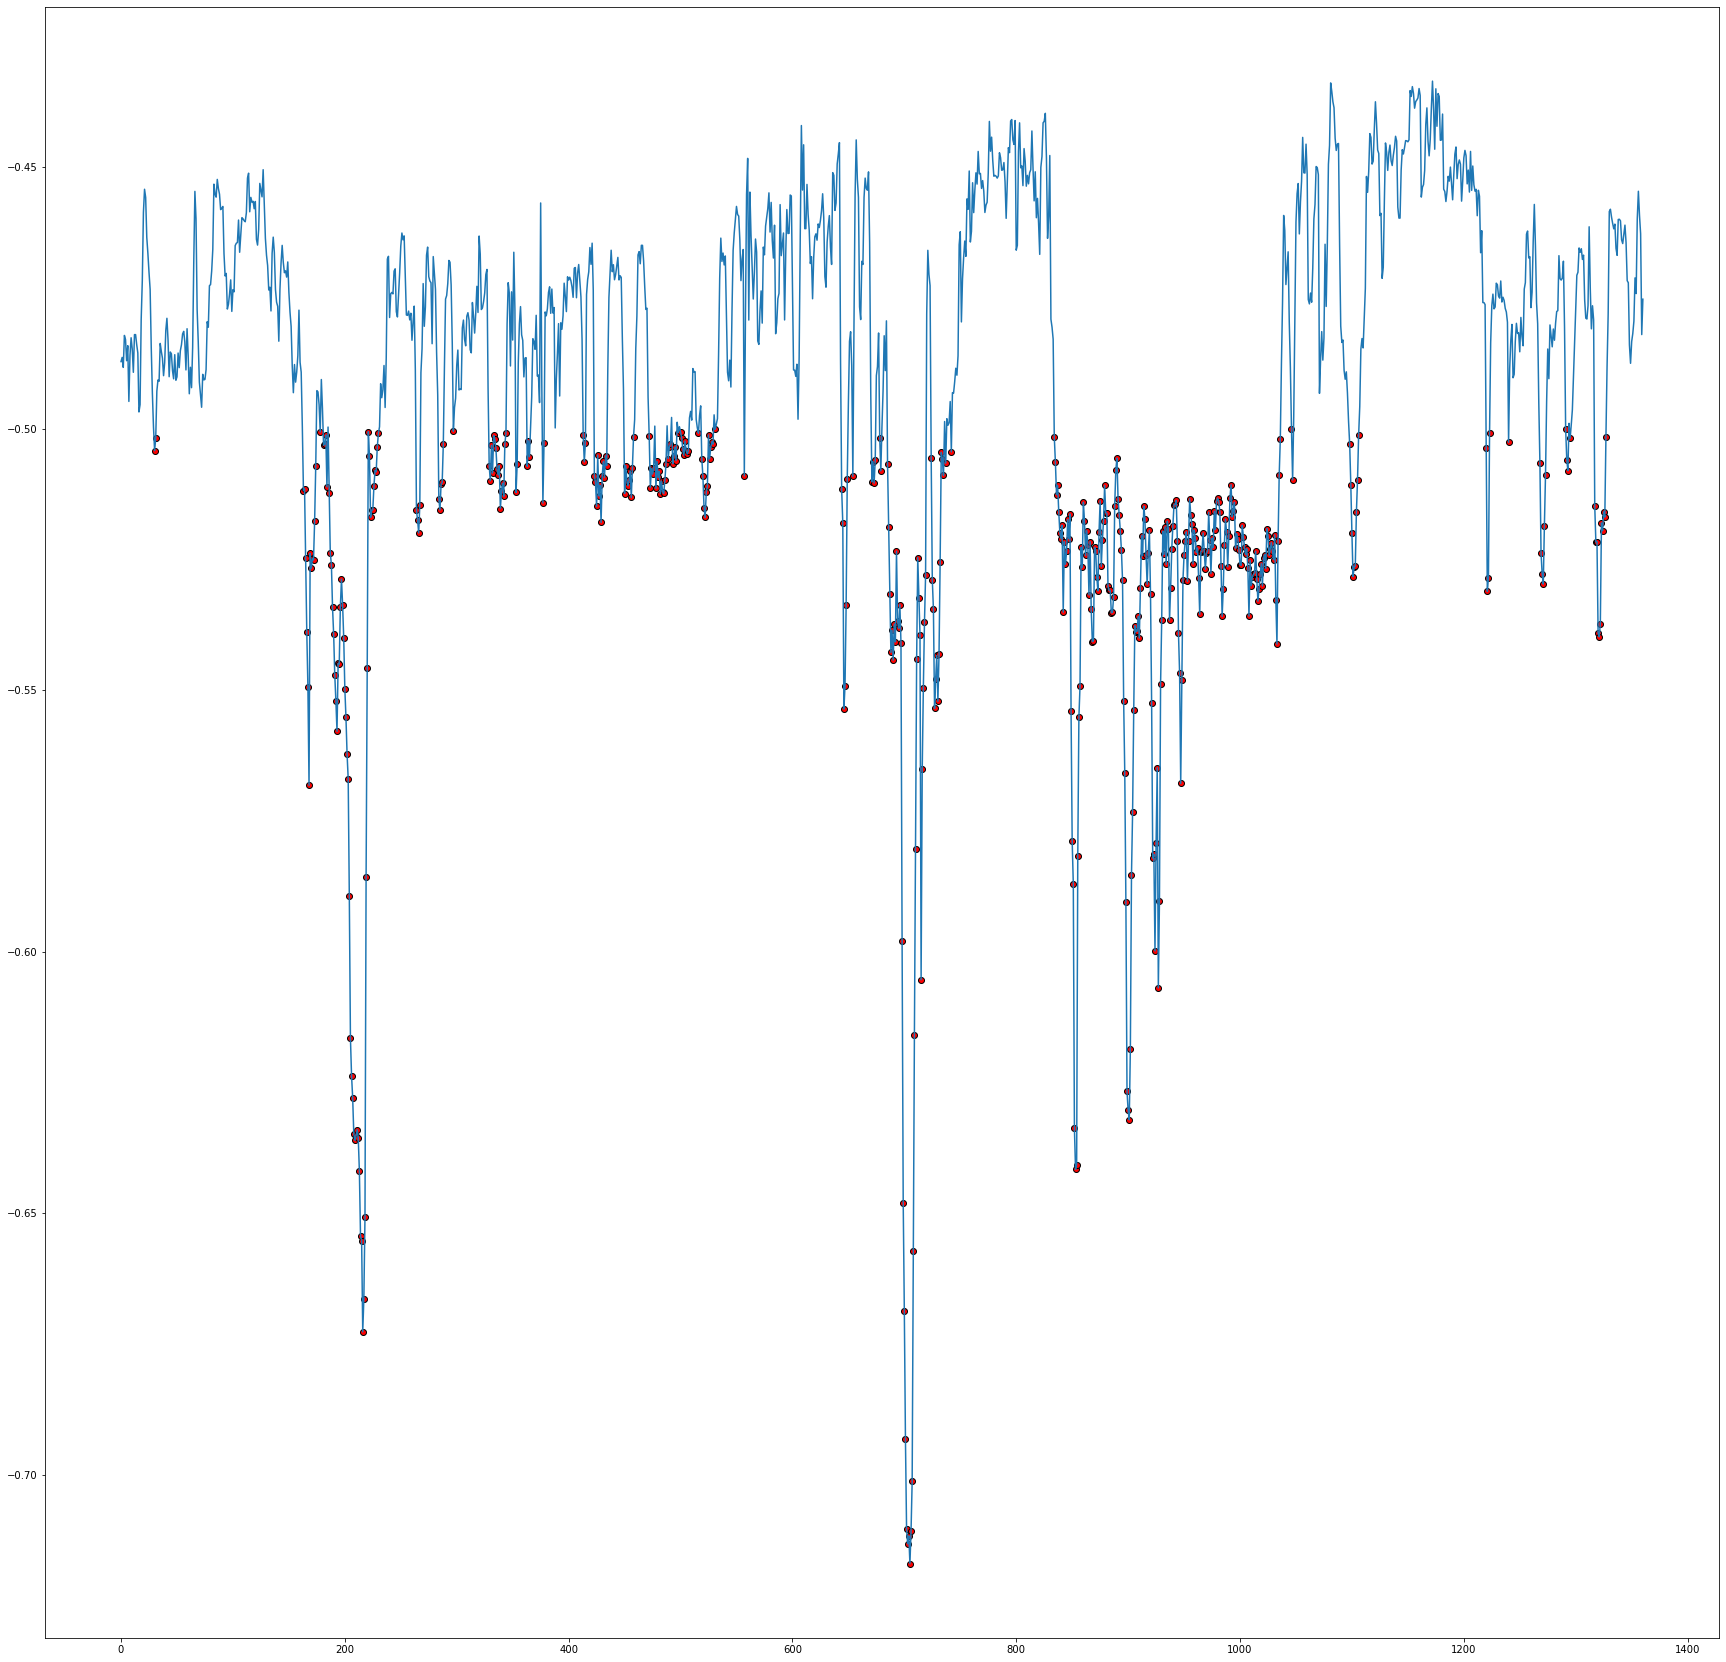

In [41]:
x=od.if_outliers()
y=x.if_index(df)
z=x.if_score(df)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
plt.plot(df.index,z)
plt.scatter(y,z[[i for i in y]],
                edgecolor="k",color="red",marker="o")
plt.scatter(IQR_outliers_total,z[[i for i in IQR_outliers_total]],
            edgecolor="k",color="black",marker="x")
plt.show()


In [42]:
print(len(set(y).intersection(set(IQR_outliers_total))))
print(len(set(y).difference(set(IQR_outliers_total))))
print(len(set(IQR_outliers_total).difference(set(y))))

0
468
0


## 데이터 셋-4: stock price, time seires

In [43]:
df=od.pd.read_csv(PATH+"GME_stock.csv")
rate=1.5
IQR_outliers_total=[]

df=df.drop(df[['date']],axis=1)
cols=df.columns
for i,col in enumerate(cols):
    ## 각 col마다 iqr 범위
    quartile_1 = df[col].quantile(0.25) #1 사분위수 (25% 지점수)
    quartile_3 = df[col].quantile(0.75) #3 사분위수 (70% 지점수)
    IQR_range=abs(quartile_1-quartile_3)*rate
    IQR_under=quartile_1-IQR_range
    IQR_up=quartile_3+IQR_range
    
    count=0
    
    outlier=od.np.zeros(len(df[col]))
 

    df_prime=df[col].values
    for j,value in enumerate(df_prime):
        if value>IQR_up or value<IQR_under:
            outlier[j]=-1
   
    outlier=od.pd.DataFrame(outlier,columns=['outlier'])

    IQR_outlier=outlier.loc[outlier['outlier']==-1]
    temp=list(IQR_outlier.index)
    IQR_outliers_total.extend(temp)

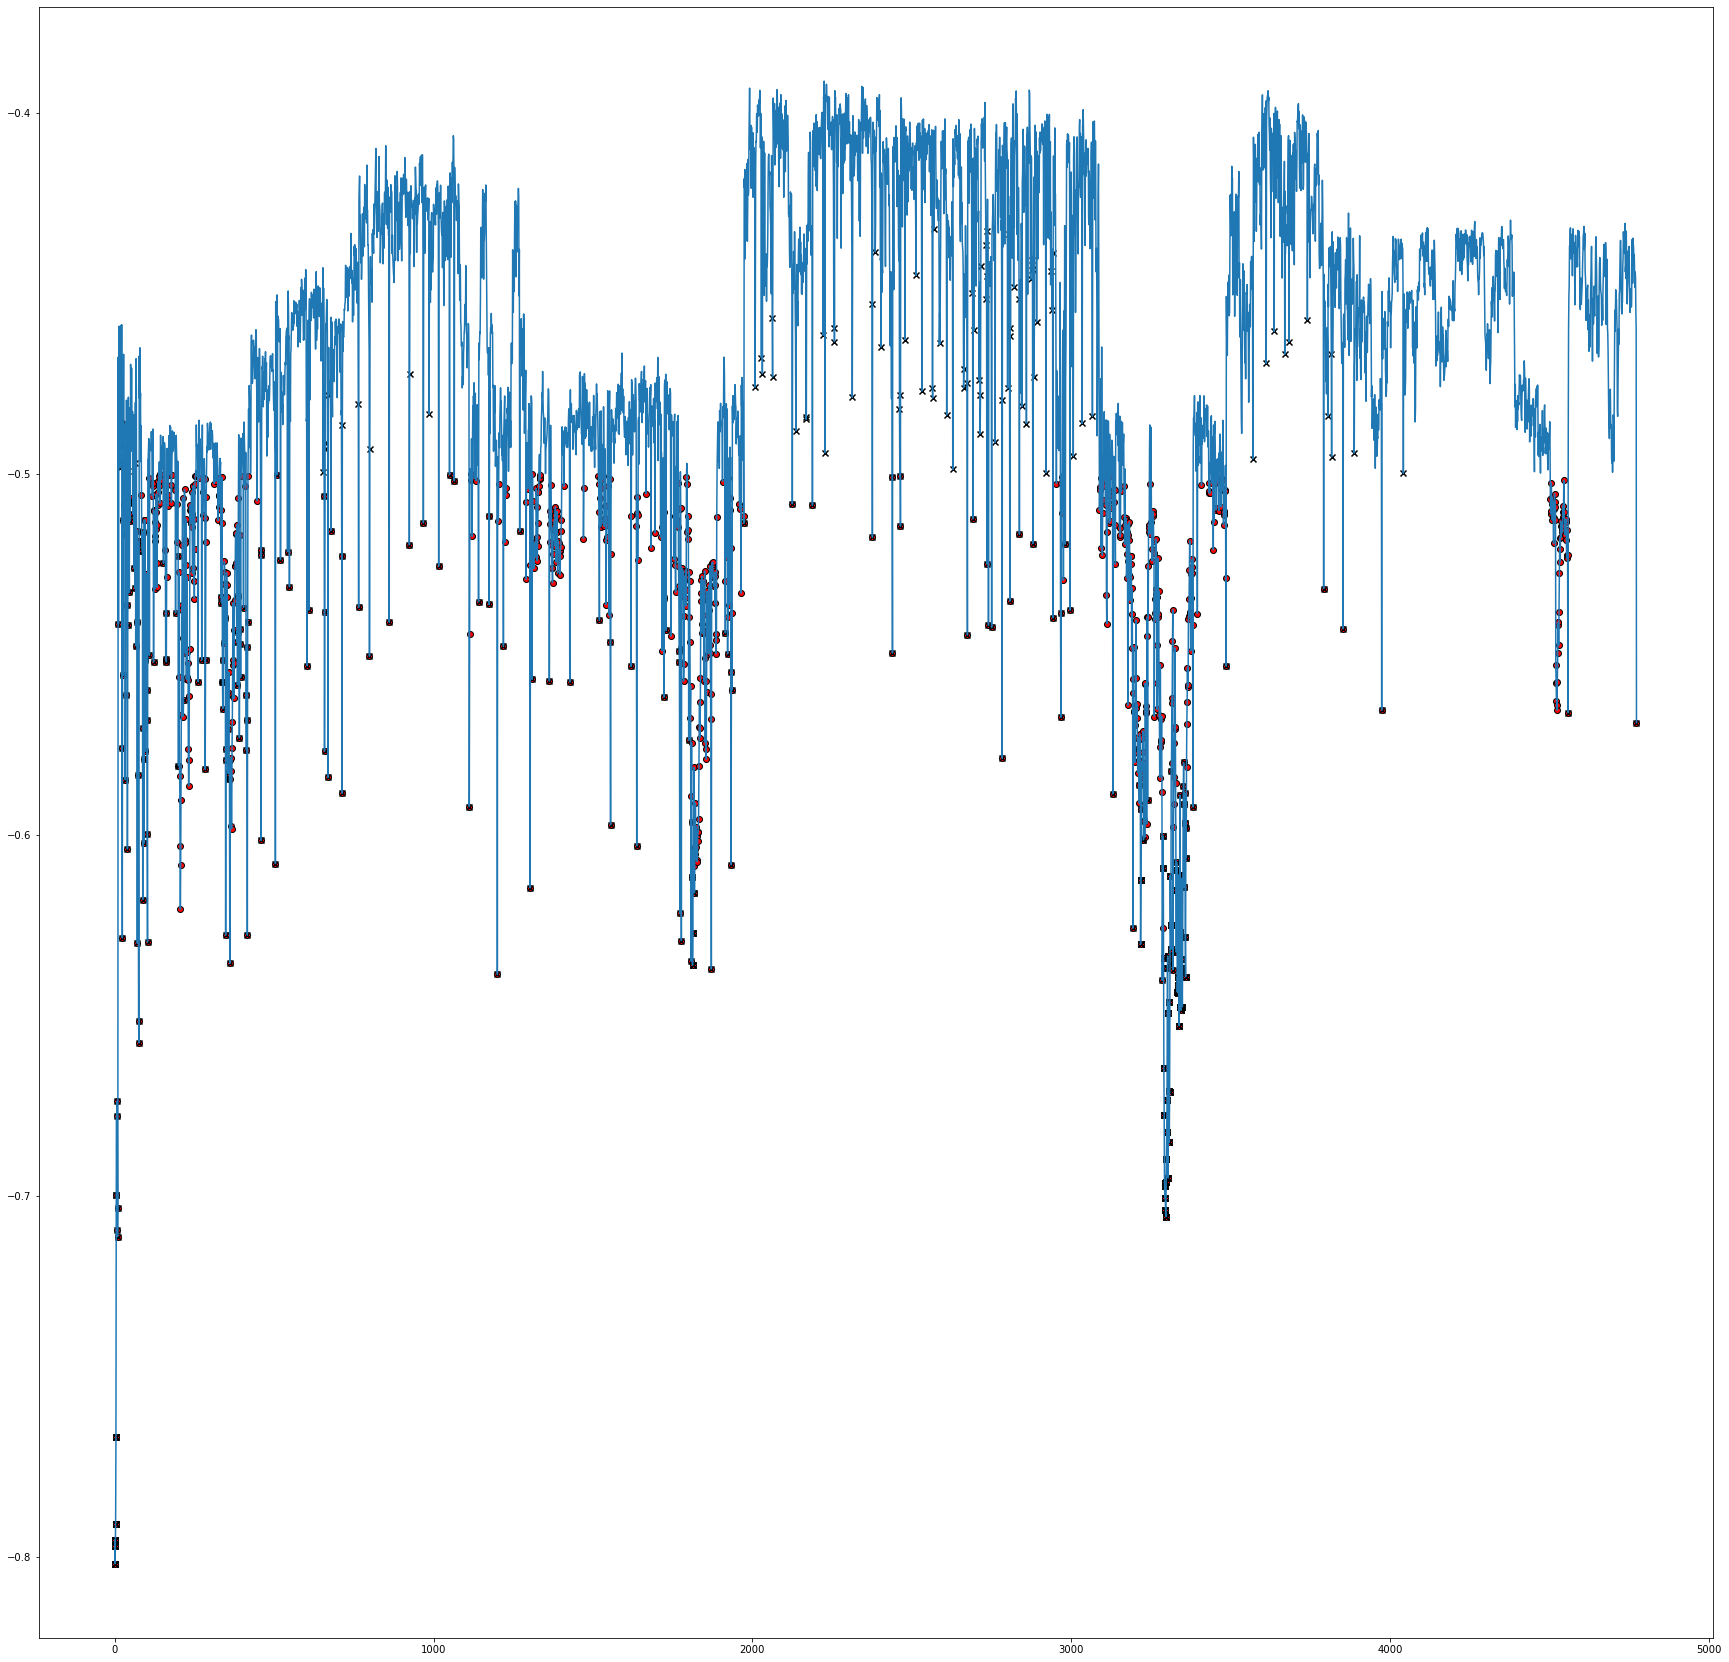

In [44]:
x=od.if_outliers()
y=x.if_index(df)
z=x.if_score(df)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
plt.plot(df.index,z)
plt.scatter(y,z[[i for i in y]],
                edgecolor="k",color="red",marker="o")
plt.scatter(IQR_outliers_total,z[[i for i in IQR_outliers_total]],
            edgecolor="k",color="black",marker="x")
plt.show()


In [45]:
print(len(set(y).intersection(set(IQR_outliers_total))))
print(len(set(y).difference(set(IQR_outliers_total))))
print(len(set(IQR_outliers_total).difference(set(y))))

271
647
92


## 결론
- 처음 두 데이터 셋은 if가 IQR에 모두 속함
- 3번째 데이터 셋에서는 IQR을 통해서 검출된 게 하나도 없었음
- 4번째 데이터 셋에서는 if를 통해서 검출된 게 훨씬 많음